# Final Project
### Saghar Sahebi 

### project description
Write a python program that will analyze the two dashcam videos provided (mcgill_drive.mp4 and st-catherines_drive.mp4, each are 30 frames per second, and are taken with the same car/dashcam) and provide the following analytics:

- Number of parked cars passed
- Number of moving cars passed
- Number of pedestrians passed
- Bonus output: Maximum speed in km/hour of the car with the dashcam

You can use any software (except for software developed by other students in the class).

Write a report that provides the following:

detailed description of the overall approach taken. State clearly any assumptions that you made.
descriptions of each software package or routine used
summary of program output on the two videos, with comparison to manually obtained ground truth values
discussion of program performance and problems
all python code that you developed (best done by submitting the report as a Jupyter notebook with embedded code)
In doing this project, it is best to think like an engineer - think about what information is needed to provide the required results, and how do we get this information? The needed information is not always to be found in the image data.

**Note: For simplisity and to have a cleaner code and explain each observation in detail, my program consists of 4 code section. code 1 and code 3 are similiar but calculate the number of cars for mcgill_video anf st-catherine_video respectively and code 2 and code 4 calculate the number of pedestrians in each video separately.**

## video 1: mcgill video (cars)
Approach and code description:
The code is a video processing program for analyzing a dashcam footage using a deep learning model for object detection and a tracking algorithm for monitoring the movement of detected objects, particularly cars.

**Libraries**
- The imported libraries include OpenCV, Numpy, YOLO from Ultralytics and Deepsort from deep_sort_realtime.deepsort_tracker.

**Variables**
At first I defind the variables i need for my code:
- pathDir : it defines the directory path to where my project + videos are located
- video: this variable is the full path + the name of the video. In this case it is the mcgill_drive.mp4 video that the course instructor provided to us. 
- model: it downloads the YOLOv8n in the directory from the YOLO function from Ultralytics
- cap: loads the video (like cv2.imread but for videos)
- frame_width, frame_height: as obvious from their names it's to get the width and height of the video (a fram of the video)
- prev_frame, prev_bboxes = variables to save the previous frame. to do so we copy a frame after reading it at the end of our program. so basically after reading frame and doing all our calculations we copy the frame into prev_frame and so when we move to frame 1, prev_frame is holding frame. prev_bboxes keeps track of the coordinates of the object detected in the prev_frame
- counted_cars = this is set that saves the track_id of the track we have already counted either as stationary or as moving
- object_appearances = in my observation in the output video i encountered a problem where sometimes there are frames who appear and go away very quick without having detected an object correctly or detected an object that has already been detected. So remove those i implemented a feature where i keep track of the detected cars and if they don't appear in more than 6 consecutive frams then they will be removed. Detected cars appear in more than 10 frames and so this does not cause any problem but rather optimizes our output.
- tracker: tracker initiallizes a tracking algorithm , in this case deep sort which keeps tracking an object throughout the frames. Many source codes exist however i decided to go with a pre-existing library. It does not work 100% well and so that why cars are a bit miscounted in my case. 
- out: this determines the location and configurations of our output file. Even though the output file is not important in our project it helped greatly in figuring out the problems of my code. 

**Functionality**
the code enters a while loop and read the video frame by frame. if no frame is found then break the loop. Otherwise we run the YOLO detector by predicting our objects in a frame. Once done we eliminate objects which have a confidence of less than 60%. In my code 50% was too low and 70% eliminated some detected cars so the middle number acted perfectly. after that i get the coordinates of the detected object and the type of object they are by using their class id(car, person, traffic light etc). Since we are only looking to count the number of cars i only resume my code with class_id ==2 which are cars and i append its information to a list i initialized earlier called car_list. After that i update my tracker with the car_list from the current fram i start looping through the cars. first i retrieve their tracking ID which is an ID that the Deep sort/tracker has initialized and it will help keep track of the detected cars. This ID is unique for each car. Along with the track_id i also retrieve the coordinates of them. Now this is where min_proccessed_frames come into play and makes sure that only cars that appear in more than 6 frames are going to be counted and other will be dropped. For the 'good' cars i draw a bounding box using the cv2.rectangle and the coordinates i retrieved earlier. It's not necessary but it's better to also put the track_id of each car to have beeter visuallization of how cars are being tracked. If the id of a car keeps changing then that means the tracker is not working well. After all these steps, now this is where i differentiate between a stopped car and a moving car and count them when the dashcam passes by them . A couple checks are made before that. 1- i make sure the previous fram is not empty otherwise i will encounter an error. 2- i also check if the tracking id exist in the previous frame. 3- one last check i do is that i check whether the car has been already counted or not using the counted_cars variable. now once these checks are done i enter if loop where i get the coordinates of the car in the previous frame using its track id and then pass the xmin and xmax to the dashcam_pass method. what this method does is that i checks if one of these coordinates are less than 10 or more than 2550. At first i used 0 and frame_width but encountered some misscalculations and i found that it's best to use these numbers. this basically calculayes if the object is out of the frame meaning the car with the dashtcam has passed by it. in the case that it is passed i return true and false otherwise. After doing this check then i differentiate between a moving car and a stopped car by using the is_moving method. is_moving takes the coordinated of the detected car both in the current frame and in the previous frame along with a threshold. It then calculates the center points of this object and if the measure(distance) between the two points is less than the threshold defined it returns true and so the object is moving. but how did i calculate this threshold. At first i defined a randome threshold and printed the displacement(the distance). based on the outputs i got no moving car had a displacement less than 19 and no parked car had a displacement more than 19.This threshold is different in the st-catherines video.After all this now if the is_moving returns true i increment the numner of moving_cars by one and if not i increment the number of stopped cars by one. I then print the number of botg moving and passing car and release the source and output video to maje sure they are both closed and i free up the system resource. 

**Problems and downsides**
So there are a couple problems that i have noticed that i'm going to outline: 

1- the tracking doesn't work perfectly and there are times where it counts a vehicle 2 times with two different IDs. This happened 2 times where it detects a parked car and at the same thing a moving vehicle passes and blocks the parked vehicle and so when the moving car passes the parked vehicle is counted as a different one.I included a screenshot below. the tracker also acts very weird when there are multiple cars parked back to back. this case was specially in the st-Catherines video.(see screenshot below)

2- this method is not accurate since the speed of the vehicle recording can change and vary a lot and so comparing the center distances will not work anymore. In these videos however the speed is mostly constant and my method works.

3- calculating the threshold required a good differentiation between the speed of the moving cars and the speed of the car recording.

4- the video detects cars in other streets as well. or for example in the st-catherine video a car appears in the window of a store and so it detects it as a new car and counts it. (image provided below )

5- there is no differentiation between parked cars or stationary cars(for example stopped behind a light)



**Comparison and accuracy**
- manually counted parked cars:14
- number of detected parked cars: 18--> 2 of these cars the are the cars being detected in the streets perpendicular to the current street and they are stopped due to traffic light
- manually counted moving cars:22
- number of detected moving cars:23


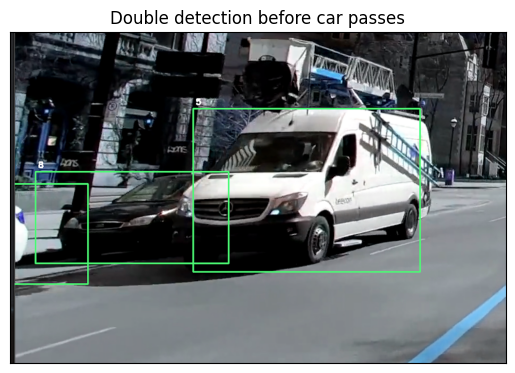

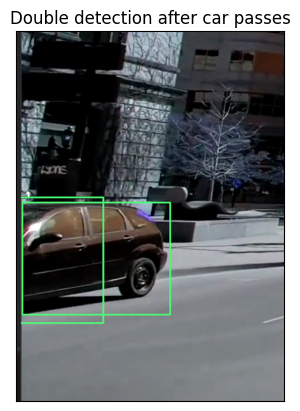

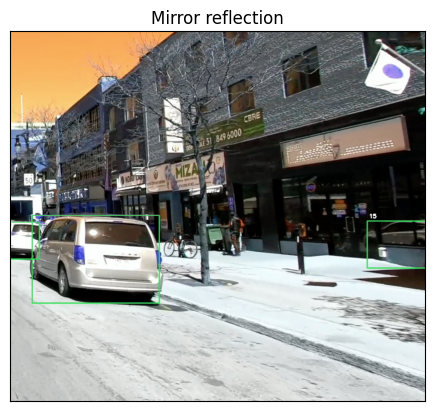

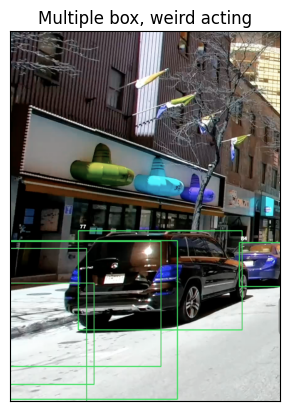

In [29]:
#this is just to display the screenshots i talked about above.
import matplotlib.pyplot as plt
import cv2
dd = cv2.imread('/Users/sagha/Desktop/Mcgill-courses/ECSE-415/FinalProject/doubleDetection.png')
plt.title("Double detection before car passes")
plt.imshow(dd)
plt.yticks([]),plt.xticks([])
plt.show()

dd1 = cv2.imread('/Users/sagha/Desktop/Mcgill-courses/ECSE-415/FinalProject/doubleDetection1.png')
plt.title("Double detection after car passes")
plt.imshow(dd1)
plt.yticks([]),plt.xticks([])
plt.show()

mr = cv2.imread('/Users/sagha/Desktop/Mcgill-courses/ECSE-415/FinalProject/mirrorReflection.png')
plt.title("Mirror reflection")
plt.imshow(mr)
plt.yticks([]),plt.xticks([])
plt.show()

weird = cv2.imread('/Users/sagha/Desktop/Mcgill-courses/ECSE-415/FinalProject/weirdDetector.png')
plt.imshow(weird)
plt.title("Multiple box, weird acting")
plt.yticks([]),plt.xticks([])
plt.show()





In [14]:
from ultralytics import YOLO
import numpy as np
from deep_sort_realtime.deepsort_tracker import DeepSort


In [31]:
def dashcam_passed(prev_xmin, prev_xmax):
  if ( prev_xmin <10 or prev_xmax > 2550):
    result = True
  else:
    result = False
  return result

def is_moving(prev_xmin, prev_ymin, prev_xmax, prev_ymax, xmin, ymin, xmax,ymax, threshold):
  center1 = np.array([(xmin + xmax) / 2, (ymin + ymax) / 2])
  center2 = np.array([(prev_xmin + prev_xmax) / 2, (prev_ymin + prev_ymax) / 2])

  displacement = np.linalg.norm(center2 - center1)
  print('displacement:',displacement)
  return displacement > threshold



pathDir = "/Users/sagha/Desktop/Mcgill-courses/ECSE-415/FinalProject/"
mcgill_video = pathDir + 'mcgill_drive.mp4'
model=YOLO(pathDir+'yolov8n.pt')

#loading and reading video and getting the height and width 
cap = cv2.VideoCapture(mcgill_video)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


prev_frame = None
prev_bboxes = []
num_moving_cars= 0
num_stopped_cars = 0
counted_cars = set()
min_proccessed_frames = 6
object_appearances={}
#initializing the tracker
tracker = DeepSort()

#output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(pathDir+'output_mcgill.mp4', fourcc, 30.0, (frame_width,frame_height))
   
while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame)[0]
    car_list = []

    for data in results.boxes.data.tolist():
        confidence = data[4]
        if float(confidence) < 0.6:
            continue
        xmin, ymin, xmax, ymax = int(data[0]), int(data[1]), int(data[2]), int(data[3])
        class_id = int(data[5])

        #class_id of car is 2 so we only count those
        if class_id == 2:
          car_list.append([[xmin, ymin, xmax - xmin, ymax - ymin], confidence, class_id])

    car_bbox_id = tracker.update_tracks(car_list, frame=frame)

    for track in car_bbox_id:
        track_id = track.track_id
        ltrb = track.to_ltrb()

        xmin, ymin, xmax, ymax = int(ltrb[0]), int(ltrb[1]), int(ltrb[2]), int(ltrb[3])
        # if object does not appear in 6 consecutive frames then remove it. explained more in the report
        if track_id not in object_appearances:
            object_appearances[track_id] = 1
        else:
            object_appearances[track_id] += 1

        if object_appearances[track_id] >= min_proccessed_frames:
          #draw bounding boxes
          cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0,255,0), 2)
          #put the tracking id
          cv2.putText(frame, str(track_id), (xmin + 5, ymin - 8),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
          
          #i count the number of cars by comparing their position with their previous position. however to not double count them i keep track of the cars that have been counted already
          if prev_frame is not None and track_id in prev_bboxes and track_id not in counted_cars:
            #print('track ID', track_id)
            prev_bbox = prev_bboxes[track_id]
            prev_xmin, prev_ymin, prev_xmax, prev_ymax = map(int, prev_bbox)
            #print("previous bbox-id", prev_bbox)
            passed = dashcam_passed(xmin,xmax)

            if passed:
                print('car with ID number', track_id ,'has passed')
                # the threshold is calculated based on a specific observation explained in the report
                if is_moving(prev_xmin, prev_ymin, prev_xmax, prev_ymax, xmin, ymin, xmax,ymax, 19):
                  print('the car is moving',passed)
                  num_moving_cars += 1
                else:
                  num_stopped_cars += 1
   
                counted_cars.add(track_id)
  
    prev_frame = frame.copy()
    prev_bboxes = {track.track_id: track.to_ltrb() for track in car_bbox_id}
    #write the frame to the output vide
    out.write(frame)  

print('number of moving cars:',num_moving_cars)
print('number of stopped cars:',num_stopped_cars)

cap.release()
out.release()
cv2.destroyAllWindows()


0: 384x640 6 cars, 67.7ms
Speed: 2.4ms preprocess, 67.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 149.3ms
Speed: 3.7ms preprocess, 149.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 6 cars, 107.1ms
Speed: 2.9ms preprocess, 107.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 68.5ms
Speed: 3.2ms preprocess, 68.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 144.9ms
Speed: 4.5ms preprocess, 144.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 6 cars, 188.5ms
Speed: 4.8ms preprocess, 188.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 163.5ms
Speed: 4.1ms preprocess, 163.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 91.8ms
Speed: 3.6ms preprocess, 91.8ms inference, 0.7ms postprocess per image at s

## video 1: mcgill video (pedestrians)
My work here is a copy paste from the above code with the following exceptions:

1- the class id for person is 0 and so i replaced it instead of 2

2- i also detect and track the bicycles and subtract that number from the number of pedestrians. This is because the detector does not differentiate between a pedestrian and a cyclist and count the number of 'person'. 

**Comparison and accuracy**
The light and brightness in this video is not really good specially in the pavements and due to this matter some pedestrians that a normal human eye can see, the detector cannot detect. In this matter maybe it would be better to use some segmentation techniques to have better results. 
- manually counted pedestrians: 22
- number of detected pedestrians: 22


In [23]:
pathDir = "/Users/sagha/Desktop/Mcgill-courses/ECSE-415/FinalProject/"
mcgill_video = pathDir + 'mcgill_drive.mp4'
model=YOLO(pathDir+'yolov8n.pt')

#loading and reading video and getting the height and width 
cap = cv2.VideoCapture(mcgill_video)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


prev_frame = None
prev_bboxes = []
num_pedestrians= 0
num_bicycles = 0
counted_pedestrians = set()
min_proccessed_frames = 2
object_appearances={}
counted_bicycles = set()
#initializing the tracker
tracker = DeepSort()

#output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(pathDir+'output_pedestrian_mcgill.mp4', fourcc, 30.0, (frame_width,frame_height))
out1 = cv2.VideoWriter(pathDir+'output_final_mcgill.mp4', fourcc, 30.0, (frame_width,frame_height))
while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame)[0]
    pedestrian_list = []

    for data in results.boxes.data.tolist():
        confidence = data[4]
        if float(confidence) < 0.5:
            continue
        xmin, ymin, xmax, ymax = int(data[0]), int(data[1]), int(data[2]), int(data[3])
        class_id = int(data[5])

        #class_id of person is 0 so we only count those
        if class_id == 0:
          pedestrian_list.append([[xmin, ymin, xmax - xmin, ymax - ymin], confidence, class_id])

    pedestrian_bbox_id = tracker.update_tracks(pedestrian_list, frame=frame)

    for track in pedestrian_bbox_id:
        track_id = track.track_id
        ltrb = track.to_ltrb()

        xmin, ymin, xmax, ymax = int(ltrb[0]), int(ltrb[1]), int(ltrb[2]), int(ltrb[3])
        # if object does not appear in 6 consecutive frames then remove it. explained more in the report
        if track_id not in object_appearances:
            object_appearances[track_id] = 1
        else:
            object_appearances[track_id] += 1

        if object_appearances[track_id] >= min_proccessed_frames:
          #draw bounding boxes
          cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0,255,0), 2)
          #put the tracking id
          cv2.putText(frame, str(track_id), (xmin + 5, ymin - 8),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
          
          #i count the number of cars by comparing their position with their previous position. however to not double count them i keep track of the cars that have been counted already
          if prev_frame is not None and track_id in prev_bboxes and track_id not in counted_pedestrians:
            print('track ID', track_id)
            prev_bbox = prev_bboxes[track_id]
            prev_xmin, prev_ymin, prev_xmax, prev_ymax = map(int, prev_bbox)
            #print("previous bbox-id", prev_bbox)
            passed = dashcam_passed(xmin,xmax)

            if passed:
                print('person with ID number', track_id ,'has passed')
                # the threshold is calculated based on a specific observation explained in the report
                num_pedestrians += 1

                counted_pedestrians.add(track_id)
  
    prev_frame = frame.copy()
    prev_bboxes = {track.track_id: track.to_ltrb() for track in pedestrian_bbox_id}
    #write the frame to the output vide
    out.write(frame)
cap.release()
out.release()
cv2.destroyAllWindows()


prev_frame = None
prev_bboxes = []
tracker = DeepSort()
cap1 = cv2.VideoCapture(mcgill_video)
while True:
    ret, frame = cap1.read()
    if not ret:
        break

    results = model.predict(frame)[0]
    bicycle_list = []

    for data in results.boxes.data.tolist():
        confidence = data[4]
        if float(confidence) < 0.5:
            continue
        xmin, ymin, xmax, ymax = int(data[0]), int(data[1]), int(data[2]), int(data[3])
        class_id = int(data[5])

        #class_id of bicycle is 1 so we only count those
        if class_id == 1:
          bicycle_list.append([[xmin, ymin, xmax - xmin, ymax - ymin], confidence, class_id])

    bicycle_bbox_id = tracker.update_tracks(bicycle_list, frame=frame)

    for track in bicycle_bbox_id:
        track_id = track.track_id
        ltrb = track.to_ltrb()

        xmin, ymin, xmax, ymax = int(ltrb[0]), int(ltrb[1]), int(ltrb[2]), int(ltrb[3])
          #draw bounding boxes
        cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0,255,0), 2)
        #put the tracking id
        cv2.putText(frame, str(track_id), (xmin + 5, ymin - 8),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
        
        #i count the number of cars by comparing their position with their previous position. however to not double count them i keep track of the cars that have been counted already
        if prev_frame is not None and track_id in prev_bboxes and track_id not in counted_bicycles:
            print('track ID', track_id)
            prev_bbox = prev_bboxes[track_id]
            prev_xmin, prev_ymin, prev_xmax, prev_ymax = map(int, prev_bbox)
            #print("previous bbox-id", prev_bbox)
            passed = dashcam_passed(xmin,xmax)

            if passed:
                print('bicycle with ID number', track_id ,'has passed')
                # the threshold is calculated based on a specific observation explained in the report
                num_bicycles += 1

                counted_bicycles.add(track_id)
  
    prev_frame = frame.copy()
    prev_bboxes = {track.track_id: track.to_ltrb() for track in bicycle_bbox_id}
    #write the frame to the output vide
    out1.write(frame)  
    
num_fianl_pedestrians = num_pedestrians - num_bicycles
print('number of bicycles:',num_bicycles)
print('number of pedestrians with bicycles:', num_pedestrians)
print('number pedestrians:',num_fianl_pedestrians)

cap1.release()
out1.release()
cv2.destroyAllWindows()



0: 384x640 6 cars, 189.3ms
Speed: 5.9ms preprocess, 189.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 110.1ms
Speed: 3.8ms preprocess, 110.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 6 cars, 83.9ms
Speed: 3.2ms preprocess, 83.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 88.4ms
Speed: 3.0ms preprocess, 88.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 81.3ms
Speed: 3.1ms preprocess, 81.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 6 cars, 90.6ms
Speed: 2.9ms preprocess, 90.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 103.0ms
Speed: 4.3ms preprocess, 103.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 103.4ms
Speed: 2.8ms preprocess, 103.4ms inference, 1.4ms postprocess per image at sha

## video 2: st-catherine video (cars)
The implementation is exactly the same as the mcgill version except that the number of min_processed_frames was changed to 4 and the threshold for the is_moving is set to 30 and this is because the car recording the video is moving much faster than the mcgill video. As discussed above this is due to the observation i made with the displacement variable. 

**Comparison and accuracy**
- manually counted parked cars:54
- number of detected parked cars: 52
- manually counted moving cars:0
- number of detected moving cars: 6 

In [27]:

stCatherines_video = pathDir + 'st-catherines_drive.mp4'
model=YOLO(pathDir+'yolov8n.pt')

#loading and reading video and getting the height and width 
cap = cv2.VideoCapture(stCatherines_video)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


prev_frame = None
prev_bboxes = []
num_moving_cars= 0
num_stopped_cars = 0
counted_cars = set()
min_proccessed_frames = 4
object_appearances={}
#initializing the tracker
tracker = DeepSort()

#output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(pathDir+'output_stCath.mp4', fourcc, 30.0, (frame_width,frame_height))
   
while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame)[0]
    car_list = []

    for data in results.boxes.data.tolist():
        confidence = data[4]
        if float(confidence) < 0.6:
            continue
        xmin, ymin, xmax, ymax = int(data[0]), int(data[1]), int(data[2]), int(data[3])
        class_id = int(data[5])

        #class_id of car is 2 so we only count those
        if class_id == 2:
          car_list.append([[xmin, ymin, xmax - xmin, ymax - ymin], confidence, class_id])

    car_bbox_id = tracker.update_tracks(car_list, frame=frame)

    for track in car_bbox_id:
        track_id = track.track_id
        ltrb = track.to_ltrb()

        xmin, ymin, xmax, ymax = int(ltrb[0]), int(ltrb[1]), int(ltrb[2]), int(ltrb[3])
        # if object does not appear in 6 consecutive frames then remove it. explained more in the report
        if track_id not in object_appearances:
            object_appearances[track_id] = 1
        else:
            object_appearances[track_id] += 1

        if object_appearances[track_id] >= min_proccessed_frames:
          #draw bounding boxes
          cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0,255,0), 2)
          #put the tracking id
          cv2.putText(frame, str(track_id), (xmin + 5, ymin - 8),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
          
          #i count the number of cars by comparing their position with their previous position. however to not double count them i keep track of the cars that have been counted already
          if prev_frame is not None and track_id in prev_bboxes and track_id not in counted_cars:
            #print('track ID', track_id)
            prev_bbox = prev_bboxes[track_id]
            prev_xmin, prev_ymin, prev_xmax, prev_ymax = map(int, prev_bbox)
            #print("previous bbox-id", prev_bbox)
            passed = dashcam_passed(xmin,xmax)

            if passed:
                print('car with ID number', track_id ,'has passed')
                # the threshold is calculated based on a specific observation explained in the report
                if is_moving(prev_xmin, prev_ymin, prev_xmax, prev_ymax, xmin, ymin, xmax,ymax, 35):
                  print('the car is moving',passed)
                  num_moving_cars += 1
                else:
                  num_stopped_cars += 1
   
                counted_cars.add(track_id)
  
    prev_frame = frame.copy()
    prev_bboxes = {track.track_id: track.to_ltrb() for track in car_bbox_id}
    #write the frame to the output vide
    out.write(frame)  

print('number of moving cars:',num_moving_cars)
print('number of stopped cars:',num_stopped_cars)

cap.release()
out.release()
cv2.destroyAllWindows()


0: 384x640 2 persons, 7 cars, 1 bus, 1 truck, 133.8ms
Speed: 3.4ms preprocess, 133.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 8 cars, 1 bus, 1 truck, 64.6ms
Speed: 2.5ms preprocess, 64.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 7 cars, 1 bus, 1 truck, 103.2ms
Speed: 3.1ms preprocess, 103.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 6 cars, 1 bus, 1 truck, 58.2ms
Speed: 2.1ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 6 cars, 1 bus, 1 truck, 1 traffic light, 176.6ms
Speed: 14.2ms preprocess, 176.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 6 cars, 1 bus, 1 truck, 73.6ms
Speed: 2.3ms preprocess, 73.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 7 cars, 1 bus, 1 truck, 152.8ms
Speed: 2.6ms pre

## video 2: st-catherine (pedestrians)
My work here is a copy paste from the above pedestrian code of the mcgill video with the exception that i have removed the check on if pedestrians don't appear in 2 frames because the speed of the car is much more and a lot of times pedestrinas are behind the cars and it's don't appear in many frames. I also removed my bicycle logic since there exist a lot of stationary bicycles. 


**Comparison and accuracy**

- manually counted pedestrians: 80
- number of detected pedestrians: 59

In [32]:
pathDir = "/Users/sagha/Desktop/Mcgill-courses/ECSE-415/FinalProject/"
stCatherines_video = pathDir + 'st-catherines_drive.mp4'
model=YOLO(pathDir+'yolov8n.pt')


#loading and reading video and getting the height and width 
cap = cv2.VideoCapture(stCatherines_video)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


prev_frame = None
prev_bboxes = []
num_pedestrians= 0
num_bicycles = 0
counted_pedestrians = set()
min_proccessed_frames = 1
object_appearances={}
#initializing the tracker
tracker = DeepSort()

#output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(pathDir+'output_pedestrian_stCath.mp4', fourcc, 30.0, (frame_width,frame_height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame)[0]
    pedestrian_list = []

    for data in results.boxes.data.tolist():
        confidence = data[4]
        if float(confidence) < 0.5:
            continue
        xmin, ymin, xmax, ymax = int(data[0]), int(data[1]), int(data[2]), int(data[3])
        class_id = int(data[5])

        #class_id of person is 0 so we only count those
        if class_id == 0:
          pedestrian_list.append([[xmin, ymin, xmax - xmin, ymax - ymin], confidence, class_id])

    pedestrian_bbox_id = tracker.update_tracks(pedestrian_list, frame=frame)

    for track in pedestrian_bbox_id:
        track_id = track.track_id
        ltrb = track.to_ltrb()

        xmin, ymin, xmax, ymax = int(ltrb[0]), int(ltrb[1]), int(ltrb[2]), int(ltrb[3])
        # if object does not appear in 6 consecutive frames then remove it. explained more in the report
        if track_id not in object_appearances:
            object_appearances[track_id] = 1
        else:
            object_appearances[track_id] += 1

        if object_appearances[track_id] >= min_proccessed_frames:
          #draw bounding boxes
          cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0,255,0), 2)
          #put the tracking id
          cv2.putText(frame, str(track_id), (xmin + 5, ymin - 8),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
          
          #i count the number of cars by comparing their position with their previous position. however to not double count them i keep track of the cars that have been counted already
          if prev_frame is not None and track_id in prev_bboxes and track_id not in counted_pedestrians:
            print('track ID', track_id)
            prev_bbox = prev_bboxes[track_id]
            prev_xmin, prev_ymin, prev_xmax, prev_ymax = map(int, prev_bbox)
            #print("previous bbox-id", prev_bbox)
            passed = dashcam_passed(xmin,xmax)

            if passed:
                print('person with ID number', track_id ,'has passed')
                # the threshold is calculated based on a specific observation explained in the report
                num_pedestrians += 1

                counted_pedestrians.add(track_id)
  
    prev_frame = frame.copy()
    prev_bboxes = {track.track_id: track.to_ltrb() for track in pedestrian_bbox_id}
    #write the frame to the output vide
    out.write(frame)


print('number pedestrians:',num_pedestrians)
cap.release()
out.release()
cv2.destroyAllWindows()




0: 384x640 2 persons, 7 cars, 1 bus, 1 truck, 103.9ms
Speed: 3.8ms preprocess, 103.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 8 cars, 1 bus, 1 truck, 149.4ms
Speed: 3.4ms preprocess, 149.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 7 cars, 1 bus, 1 truck, 120.4ms
Speed: 6.1ms preprocess, 120.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 6 cars, 1 bus, 1 truck, 81.0ms
Speed: 3.0ms preprocess, 81.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 6 cars, 1 bus, 1 truck, 1 traffic light, 89.7ms
Speed: 2.3ms preprocess, 89.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 6 cars, 1 bus, 1 truck, 78.5ms
Speed: 2.4ms preprocess, 78.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 7 cars, 1 bus, 1 truck, 112.9ms
Speed: 3.1ms prep